**Notebook elaborado por:**

*   Wilson Antony Mamani Machaca (wilson.antony.mm@gmail.com)
*   Jose Emmanuel Cruz de la Cruz (jeccruz@yahoo.com)



##Regresion Simple

**Importar Librerias**

In [ ]:
#Libreria especializada en el manejo y análisis de estructuras de datos
import pandas as pd
#Libreria especializada en el cálculo numérico y el análisis de datos
import numpy as np
#Libreria especializada en la creación de gráficos
import matplotlib.pyplot as plt
#Libreria para la división de Data en: "Train" y "Test"
from sklearn.model_selection import train_test_split
#Libreria para importar el algoritmo de regresión lineal tipo OLS
from sklearn.linear_model import LinearRegression
#Libreria para importar el algoritmo de regresión lineal tipo Ridge
from sklearn.linear_model import Ridge
#Libreria para importar el algoritmo de regresión lineal tipo Lasso
from sklearn.linear_model import Lasso
#Libreria para importar el algoritmo de regresión lineal tipo Lasso
from sklearn.linear_model import ElasticNet
#Librerira para encontrar los valores para estas métricas usando nuestros datos de prueba
from sklearn import metrics

**Cargar Data Set**

In [ ]:
#Cargar datos del archivo CSV
cargar_archivo = pd.read_csv('student_scores.csv')
#Convertir archivo en DataFrame
data = pd.DataFrame(cargar_archivo)

**Visualizar Data**

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Viasualizar Data con comando "Head"**

In [ ]:
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


**Descripcion estadistica de la Data**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Graficar Data con Matplotlib**

In [ ]:
#Definimos La variable X de la grafica (Horas)
x=data["Hours"]
#Definimos La variable Y de la grafica (Puntuación)
y=data["Scores"]

In [ ]:
#Visualizamos datos de la variable X
x.head(25)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [ ]:
#Visualizamos datos de la variable Y
y.head(25)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

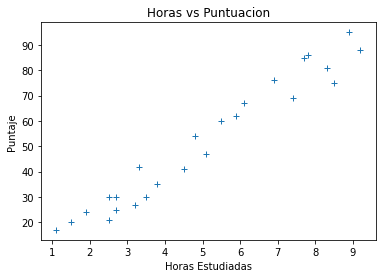

In [ ]:
#Graficamos la Data
plt.plot(x, y, "+")
#Titulo y etiquetas
plt.title('Horas vs Puntuacion')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Puntaje')
#Mostrar grafica
plt.show()

**Definimos variables para realizar la regresión**

In [ ]:
#Dividimos la data en Variables dependientes e independientes

#Variable independiente -> X
X = data[["Hours"]]
#Variable dependiente -> Y
Y = data[["Scores"]]

In [ ]:
#Visualizamos parte de la variable X
X.head(5)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
#Visualizamos parte de la variable X
Y.head(5)

,Scores
0,21
1,47
2,27
3,75
4,30


**Dividir la Data en Train y Test -> 80% y 20% Respectivamente**

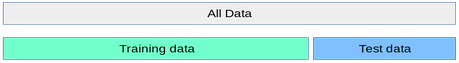

In [ ]:
#Porcentaje en la división utilizada: 0.2 = 20% (Test)
porcentaje = 0.2

In [ ]:
#Parametro generador de números aleatorios para aleatorizar la data de Train y Test
semilla = 100

In [ ]:
#Dividir Data con parametros
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=porcentaje, random_state=semilla)

**Modelo de Regresión Lineal**

In [ ]:
#Declarar el modelo en la variable "reg"
#reg = LinearRegression() #OLS
#reg = Ridge(alpha=0.01) #Ridge|Alpha=Fuerza de regularización.
#reg = Lasso() #Lasso|Alpha=Constante que multiplica el término L1.
reg = ElasticNet(l1_ratio=0.5) #ElasticNet|l1_ratio=Combinación de L1 y L2 (0 <= l1_ratio <= 1)
#Entrenar el modelo con el comando "fit" a las variables -> X_train, y_train
reg.fit(X_train, y_train)

ElasticNet()

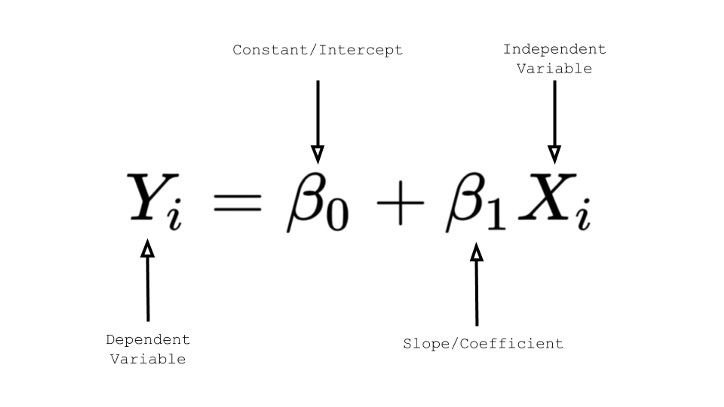

In [ ]:
#Imprimir la constante de la formula
print(reg.intercept_)

[6.2621152]


In [ ]:
#Imprimir el coeficiente de la formula
print(reg.coef_)

[9.04493706]


**Medir rendimiento del modelo**

In [ ]:
#Datos predecidos
y_pred = reg.predict(X_test)
y_pred

array([30.68344526, 40.63287602, 36.11040749, 59.62724384, 19.82952079])

In [ ]:
#Datos actuales
y_test

,Scores
9,25
22,35
13,42
11,62
5,20


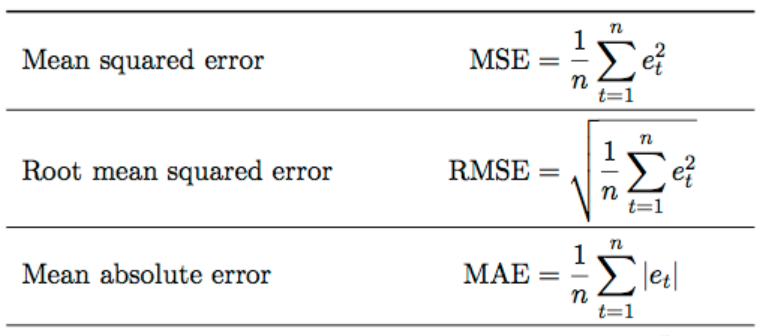

In [ ]:
#Calculamos el MSE
MSE = metrics.mean_squared_error(y_test, y_pred)
#Calculamos el RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#Calculamos el MAE
MAE = metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
#Imprimimos los valores
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)

Mean Squared Error: 20.875435426309593
Root Mean Squared Error: 4.56896437131103
Mean Absolute Error: 3.949829830852231


In [ ]:
#Calculamos la precisión del modelo
precision = reg.score(X_test, y_test)
#Imprimimos la precisión del modelo
print('Precisión: ', precision)

Precisión:  0.9039591671590468


##Regresion Multiple

**Importar Librerias**

In [ ]:
#Libreria especializada en el manejo y análisis de estructuras de datos
import pandas as pd
#Libreria especializada en el cálculo numérico y el análisis de datos
import numpy as np
#Libreria especializada en la creación de gráficos
import matplotlib.pyplot as plt
#Libreria para la división de Data en: "Train" y "Test"
from sklearn.model_selection import train_test_split
#Libreria para importar el algoritmo de regresión lineal tipo OLS
from sklearn.linear_model import LinearRegression
#Libreria para importar el algoritmo de regresión lineal tipo Ridge
from sklearn.linear_model import Ridge
#Libreria para importar el algoritmo de regresión lineal tipo Lasso
from sklearn.linear_model import Lasso
#Libreria para importar el algoritmo de regresión lineal tipo Lasso
from sklearn.linear_model import ElasticNet
#Librerira para encontrar los valores para estas métricas usando nuestros datos de prueba
from sklearn import metrics

**Cargar Data Set**

In [ ]:
#Cargar datos del archivo CSV
cargar_archivo = pd.read_csv('petrol_consumption.csv')
#Convertir archivo en DataFrame
data = pd.DataFrame(cargar_archivo)

**Visualizar Data**

In [ ]:
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


**Viasualizar Data con comando "Head"**

In [ ]:
data.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


**Descripcion estadistica de la Data**

In [ ]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


**Definimos variables para realizar la regresión**

In [ ]:
#Dividimos la data en Variables dependientes e independientes

#Variables independientes -> X
X = data[['Petrol_tax',
          'Average_income',
          'Paved_Highways',
          'Population_Driver_licence(%)']]
#Variable dependiente -> Y
Y = data[['Petrol_Consumption']]

In [ ]:
#Visualizamos parte de la variable X
X.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [ ]:
#Visualizamos parte de la variable X
Y.head(5)

,Petrol_Consumption
0,541
1,524
2,561
3,414
4,410


**Dividir la Data en Train y Test -> 80% y 20% Respectivamente**

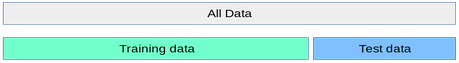

In [ ]:
#Porcentaje en la división utilizada: 0.2 = 20% (Test)
porcentaje = 0.2

In [ ]:
#Parametro generador de números aleatorios para aleatorizar la data de Train y Test
semilla = 100

In [ ]:
#Dividir Data con parametros
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=porcentaje, random_state=semilla)

**Modelo de Regresión Lineal**

In [ ]:
#Declarar el modelo en la variable "reg"
reg = LinearRegression() #OLS
#reg = Ridge(alpha=0.01) #Ridge|Alpha=Fuerza de regularización.
#reg = Lasso() #Lasso|Alpha=Constante que multiplica el término L1.
#reg = ElasticNet(l1_ratio=0.5) #ElasticNet|l1_ratio=Combinación de L1 y L2 (0 <= l1_ratio <= 1)
#Entrenar el modelo con el comando "fit" a las variables -> X_train, y_train
reg.fit(X_train, y_train)

LinearRegression()

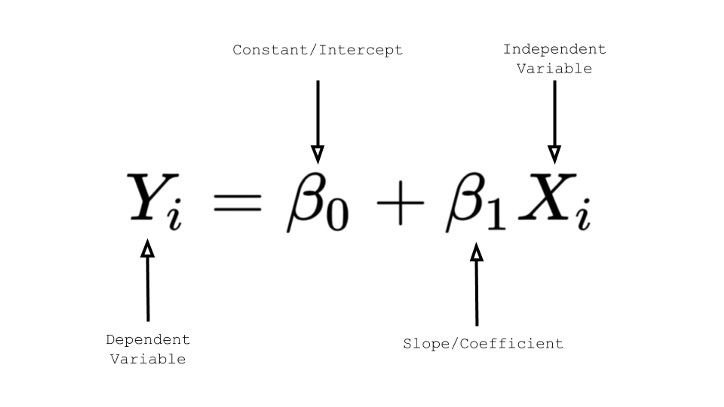

In [ ]:
#Imprimir la constante de la formula
print(reg.intercept_)

[481.63070453]


In [ ]:
#Imprimir el coeficiente de la formula
print(reg.coef_)

[[-3.70661890e+01 -8.02141438e-02 -2.27414176e-03  1.28442090e+03]]


**Medir rendimiento del modelo**

In [ ]:
#Datos predecidos
y_pred = reg.predict(X_test)
y_pred

array([[310.72647078],
       [558.70532501],
       [666.96404634],
       [600.10738362],
       [642.97098064],
       [560.32488051],
       [412.83775821],
       [658.79239232],
       [760.34665877],
       [598.72586847]])

In [ ]:
#Datos actuales
y_test

,Petrol_Consumption
6,344
28,574
32,577
26,577
41,699
47,524
5,457
40,587
18,865
31,554


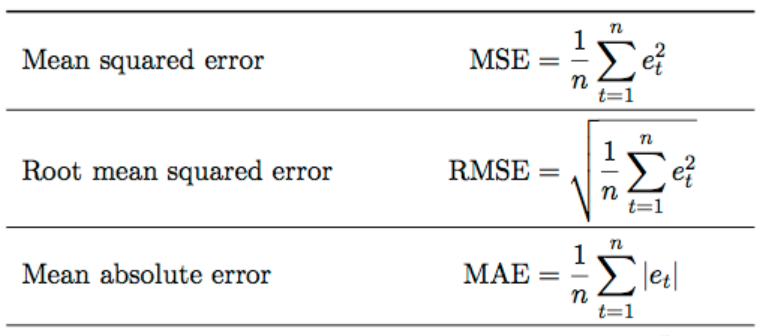

In [ ]:
#Calculamos el MSE
MSE = metrics.mean_squared_error(y_test, y_pred)
#Calculamos el RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#Calculamos el MAE
MAE = metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
#Imprimimos los valores
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)

Mean Squared Error: 3448.4459932569357
Root Mean Squared Error: 58.72347054846925
Mean Absolute Error: 51.93273778529323


In [ ]:
#Calculamos la precisión del modelo
precision = reg.score(X_test, y_test)
#Imprimimos la precisión del modelo
print('Precisión: ', precision)

Precisión:  0.7970900788670914
